# Employee Attrition Prediction

Adrija paul

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

In [2]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Data cleaning

In [5]:
df.shape

(1470, 35)

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.drop_duplicates(inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [8]:
df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [9]:
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [10]:
df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [11]:
df=df.drop(['BusinessTravel','EducationField','StockOptionLevel','RelationshipSatisfaction'],axis=1)
df.head(5)

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1102,Sales,1,2,1,1,2,Female,...,11,3,80,8,0,1,6,4,0,5
1,49,No,279,Research & Development,8,1,1,2,3,Male,...,23,4,80,10,3,3,10,7,1,7
2,37,Yes,1373,Research & Development,2,2,1,4,4,Male,...,15,3,80,7,3,3,0,0,0,0
3,33,No,1392,Research & Development,3,4,1,5,4,Female,...,11,3,80,8,3,3,8,7,3,0
4,27,No,591,Research & Development,2,1,1,7,1,Male,...,12,3,80,6,3,3,2,2,2,2


# EDA

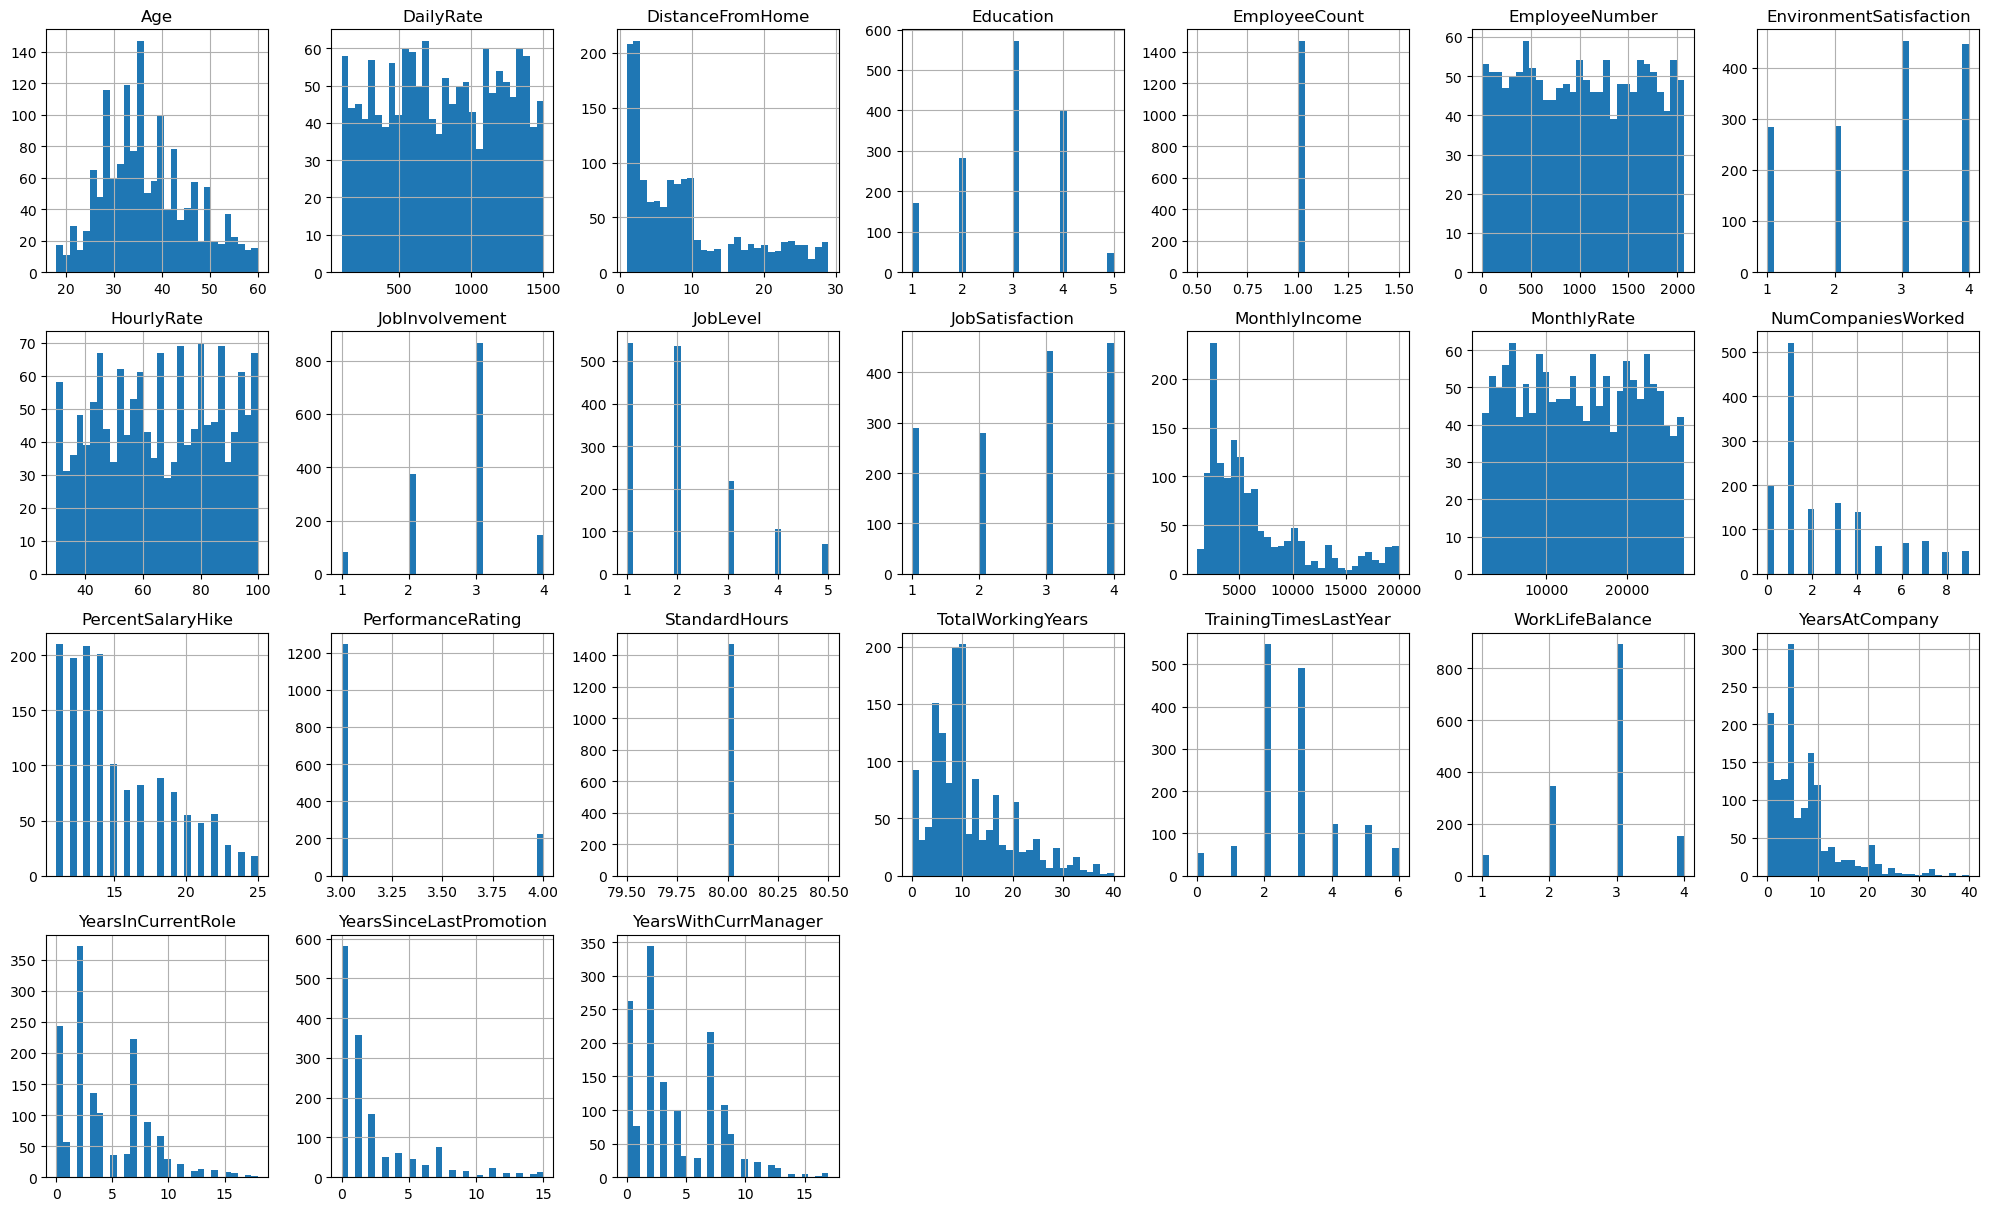

In [12]:
# Histogram of numerical features
df.hist(bins=30, figsize=(20, 15), layout=(5, 7))
plt.tight_layout()
plt.show()

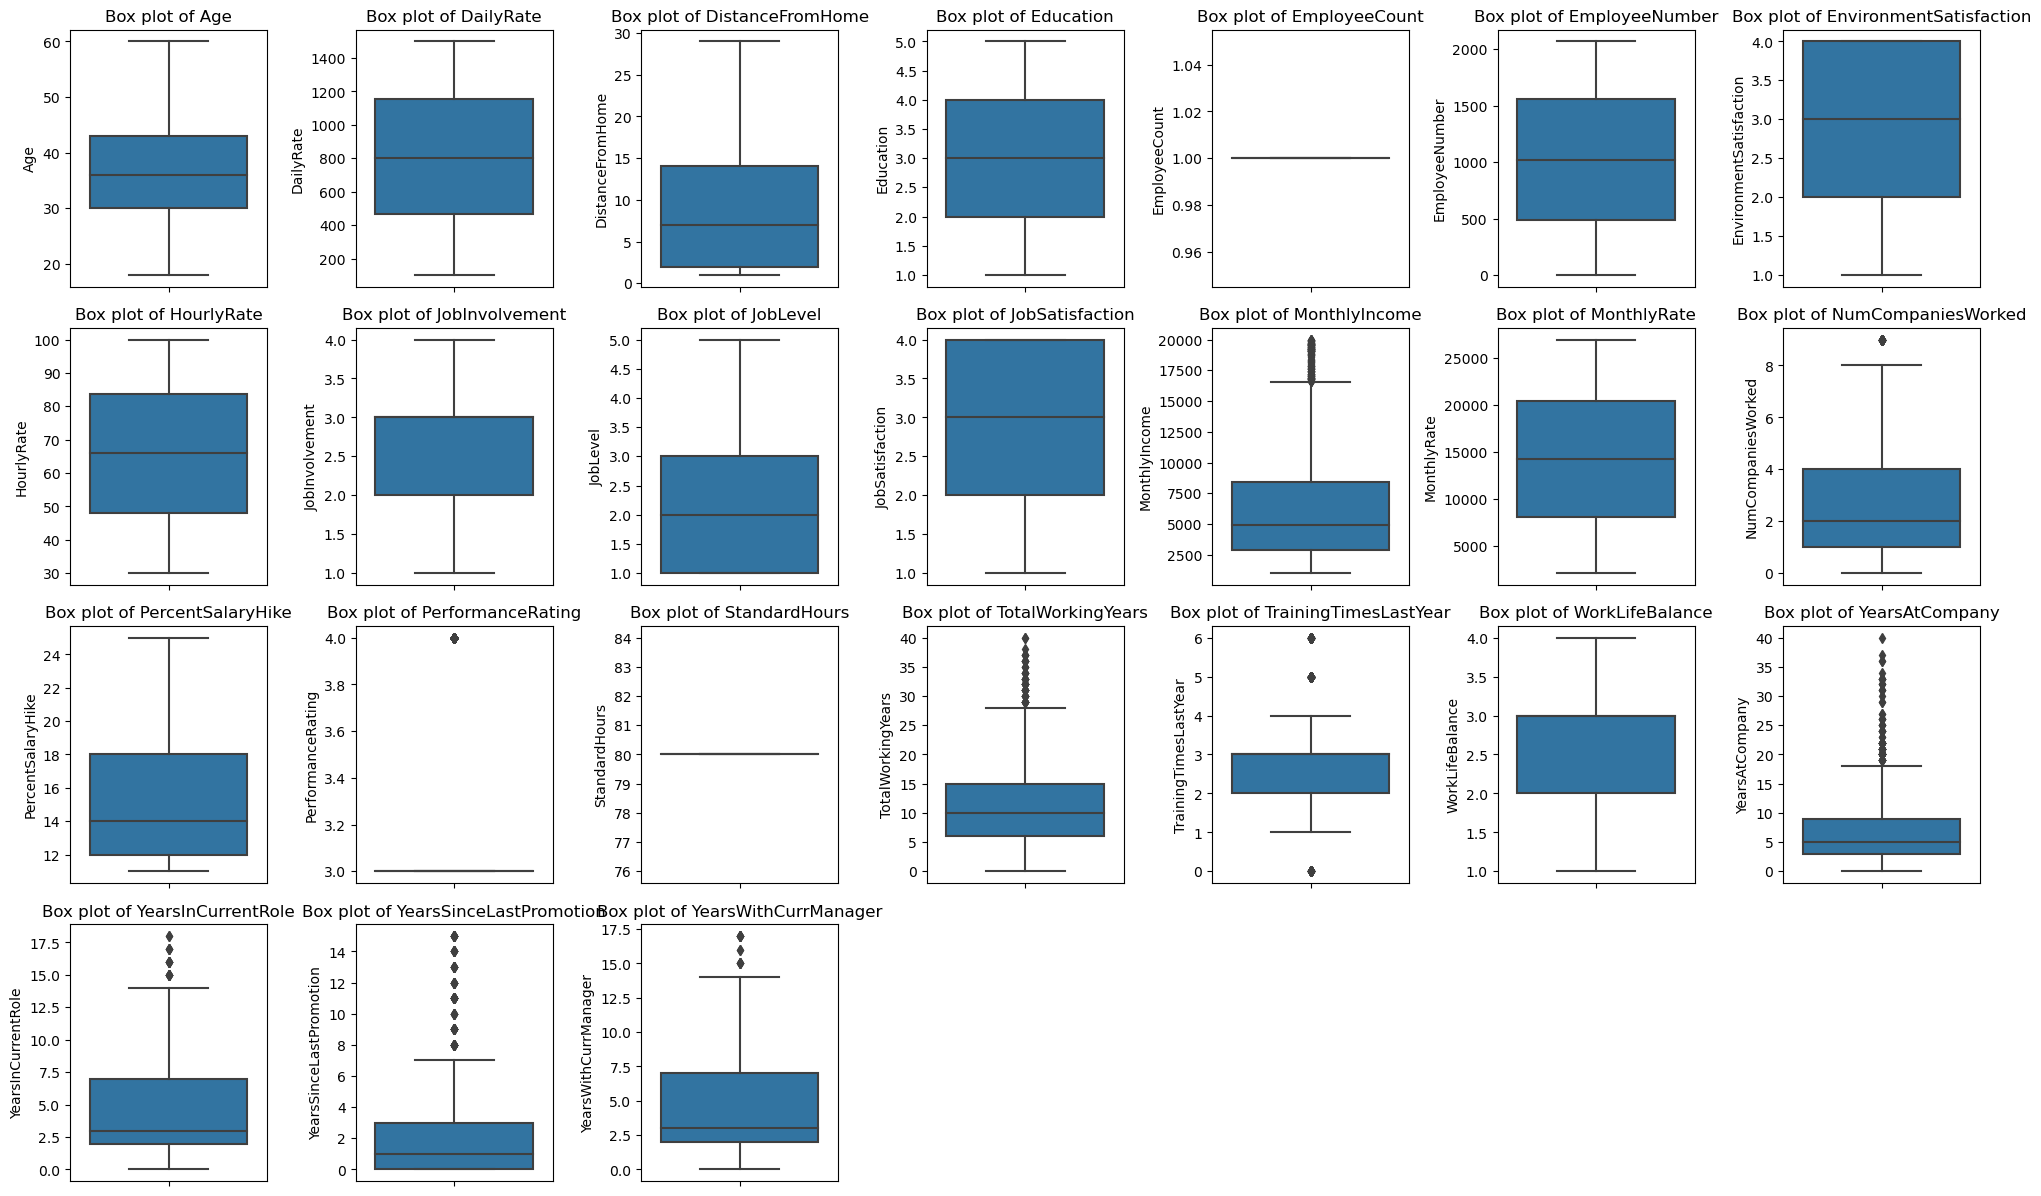

In [13]:
# Box plot of numerical features
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.select_dtypes(include=np.number).columns, 1):
    plt.subplot(5, 7, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

In [15]:
object_cols

['Attrition',
 'Department',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [16]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")
df.head(5)

All features are now numerical


,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,2,1,2,1,1,2,0,...,11,3,80,8,0,1,6,4,0,5
1,49,0,279,1,8,1,1,2,3,1,...,23,4,80,10,3,3,10,7,1,7
2,37,1,1373,1,2,2,1,4,4,1,...,15,3,80,7,3,3,0,0,0,0
3,33,0,1392,1,3,4,1,5,4,0,...,11,3,80,8,3,3,8,7,3,0
4,27,0,591,1,2,1,1,7,1,1,...,12,3,80,6,3,3,2,2,2,2


Here,encoding of the categorical columns are performed where yes is treated as 1 and no as 0.

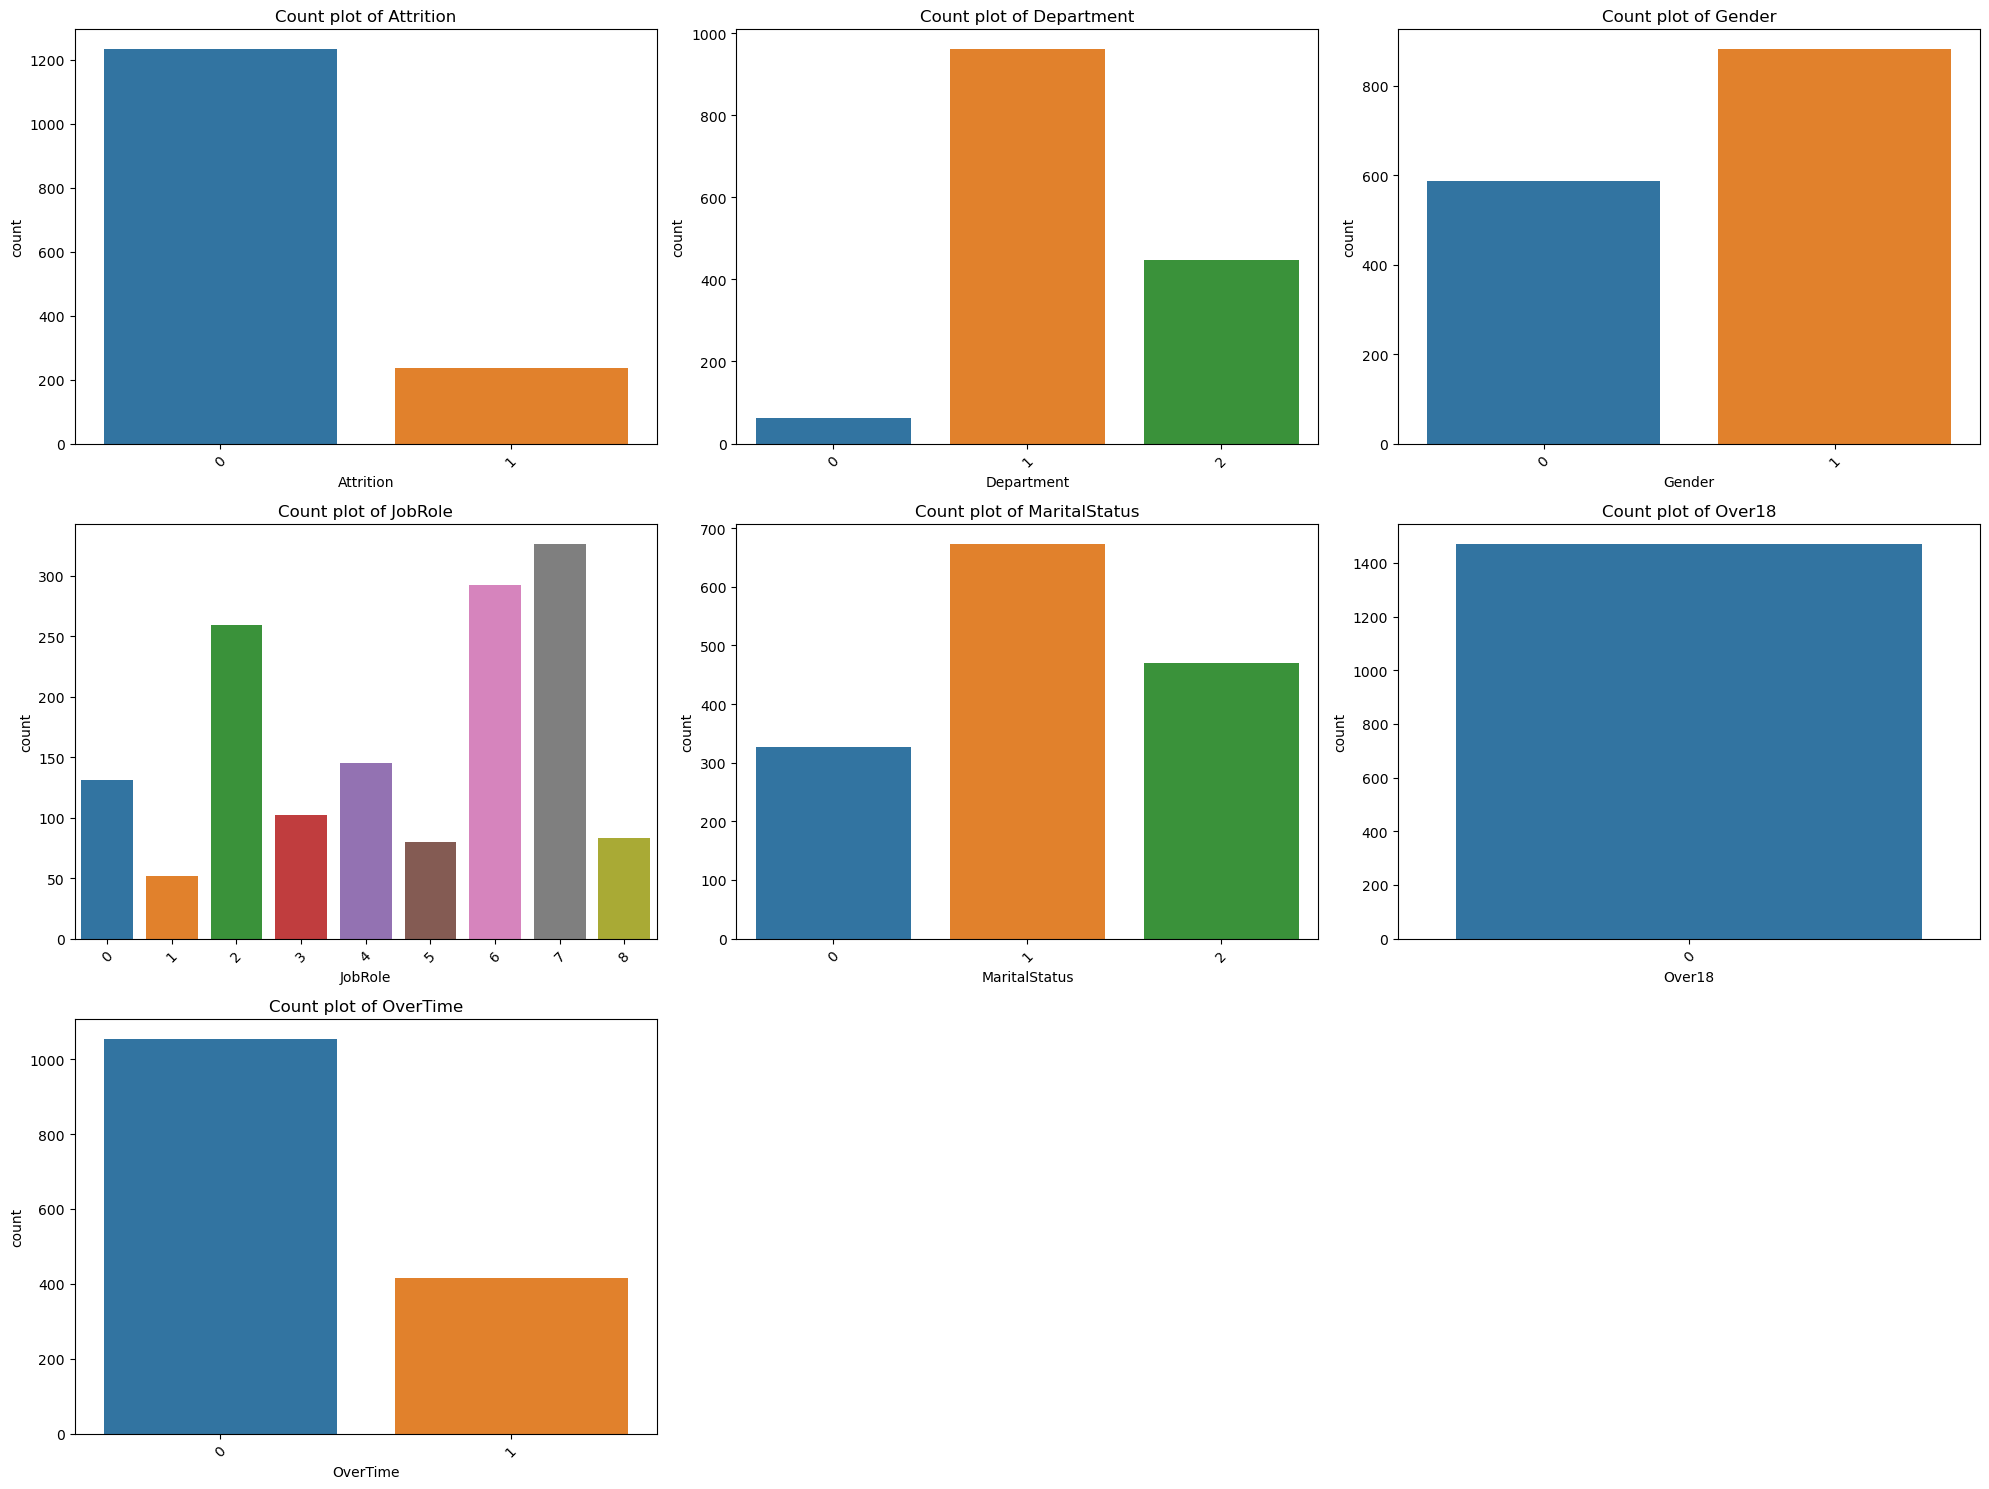

In [17]:
# List of categorical features to plot
categorical_features = ['Attrition', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

# Create count plots
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, data=df)
    plt.title(f'Count plot of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [18]:
#Over 18 column didn't have much effect so it is dropped 
df=df.drop(['Over18'],axis=1)
df

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,2,1,2,1,1,2,0,...,11,3,80,8,0,1,6,4,0,5
1,49,0,279,1,8,1,1,2,3,1,...,23,4,80,10,3,3,10,7,1,7
2,37,1,1373,1,2,2,1,4,4,1,...,15,3,80,7,3,3,0,0,0,0
3,33,0,1392,1,3,4,1,5,4,0,...,11,3,80,8,3,3,8,7,3,0
4,27,0,591,1,2,1,1,7,1,1,...,12,3,80,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,1,23,2,1,2061,3,1,...,17,3,80,17,3,3,5,2,0,3
1466,39,0,613,1,6,1,1,2062,4,1,...,15,3,80,9,5,3,7,7,1,7
1467,27,0,155,1,4,3,1,2064,2,1,...,20,4,80,6,0,3,6,2,0,3
1468,49,0,1023,2,2,3,1,2065,4,1,...,14,3,80,17,3,2,9,6,0,8


Calculation and removal of outliers

In [19]:
# Calculate IQR
Q1 = df['YearsSinceLastPromotion'].quantile(0.25)
Q3 = df['YearsSinceLastPromotion'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['YearsSinceLastPromotion'] < lower_bound) | (df['YearsSinceLastPromotion'] > upper_bound)]
print(f'Number of outliers: {len(outliers)}')


Number of outliers: 107


In [20]:
df['YearsSinceLastPromotion'] = np.where(df['YearsSinceLastPromotion'] > upper_bound, upper_bound,
                                           np.where(df['YearsSinceLastPromotion'] < lower_bound, lower_bound,
                                                    df['YearsSinceLastPromotion']))


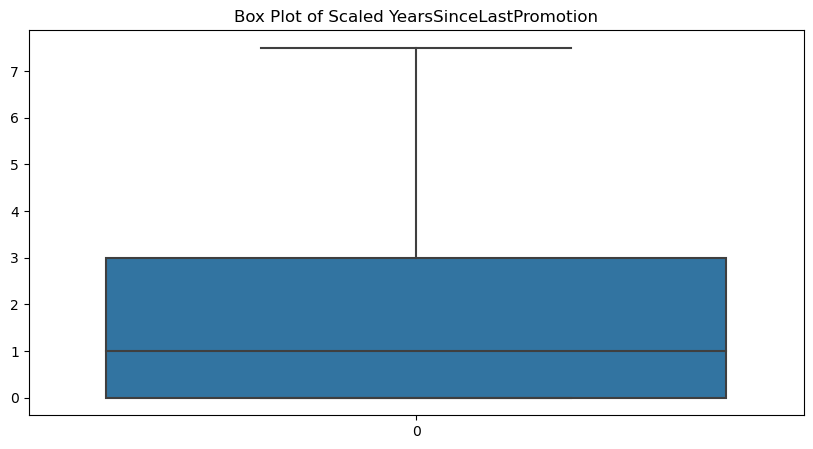

In [21]:
# Visualize transformed data
plt.figure(figsize=(10, 5))
sns.boxplot(df['YearsSinceLastPromotion'])
plt.title('Box Plot of Scaled YearsSinceLastPromotion')
plt.show()

In [22]:
# Calculate IQR
Q1 = df['TotalWorkingYears'].quantile(0.25)
Q3 = df['TotalWorkingYears'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['TotalWorkingYears'] < lower_bound) | (df['TotalWorkingYears'] > upper_bound)]
print(f'Number of outliers: {len(outliers)}')


Number of outliers: 63


In [23]:
# Remove outliers
df = df[(df['TotalWorkingYears'] >= lower_bound) & (df['TotalWorkingYears'] <= upper_bound)]

In [24]:
df

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,2,1,2,1,1,2,0,...,11,3,80,8,0,1,6,4,0.0,5
1,49,0,279,1,8,1,1,2,3,1,...,23,4,80,10,3,3,10,7,1.0,7
2,37,1,1373,1,2,2,1,4,4,1,...,15,3,80,7,3,3,0,0,0.0,0
3,33,0,1392,1,3,4,1,5,4,0,...,11,3,80,8,3,3,8,7,3.0,0
4,27,0,591,1,2,1,1,7,1,1,...,12,3,80,6,3,3,2,2,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,1,23,2,1,2061,3,1,...,17,3,80,17,3,3,5,2,0.0,3
1466,39,0,613,1,6,1,1,2062,4,1,...,15,3,80,9,5,3,7,7,1.0,7
1467,27,0,155,1,4,3,1,2064,2,1,...,20,4,80,6,0,3,6,2,0.0,3
1468,49,0,1023,2,2,3,1,2065,4,1,...,14,3,80,17,3,2,9,6,0.0,8


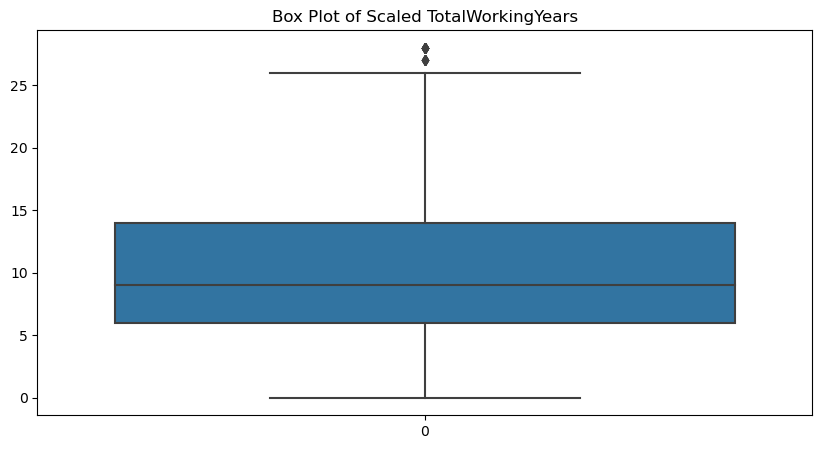

In [25]:
# Visualize transformed data
plt.figure(figsize=(10, 5))
sns.boxplot(df['TotalWorkingYears'])
plt.title('Box Plot of Scaled TotalWorkingYears')
plt.show()

In [26]:
# Calculate IQR
Q1 = df['YearsAtCompany'].quantile(0.25)
Q3 = df['YearsAtCompany'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['YearsAtCompany'] < lower_bound) | (df['YearsAtCompany'] > upper_bound)]
print(f'Number of outliers: {len(outliers)}')


Number of outliers: 77


In [27]:
# Remove outliers
df = df[(df['YearsAtCompany'] >= lower_bound) & (df['YearsAtCompany'] <= upper_bound)]

In [28]:
# Identify the target column
target_column = 'Attrition'

# Separate the features and the target
features = df.drop(columns=[target_column])
target = df[target_column]

In [29]:
from sklearn.preprocessing import StandardScaler
#Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a DataFrame with the scaled features
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Add the target column back
scaled_df = pd.concat([scaled_features_df, target.reset_index(drop=True)], axis=1)


Scaling of columns is performed so that all the columns should be numerically on one scale 

<Axes: >

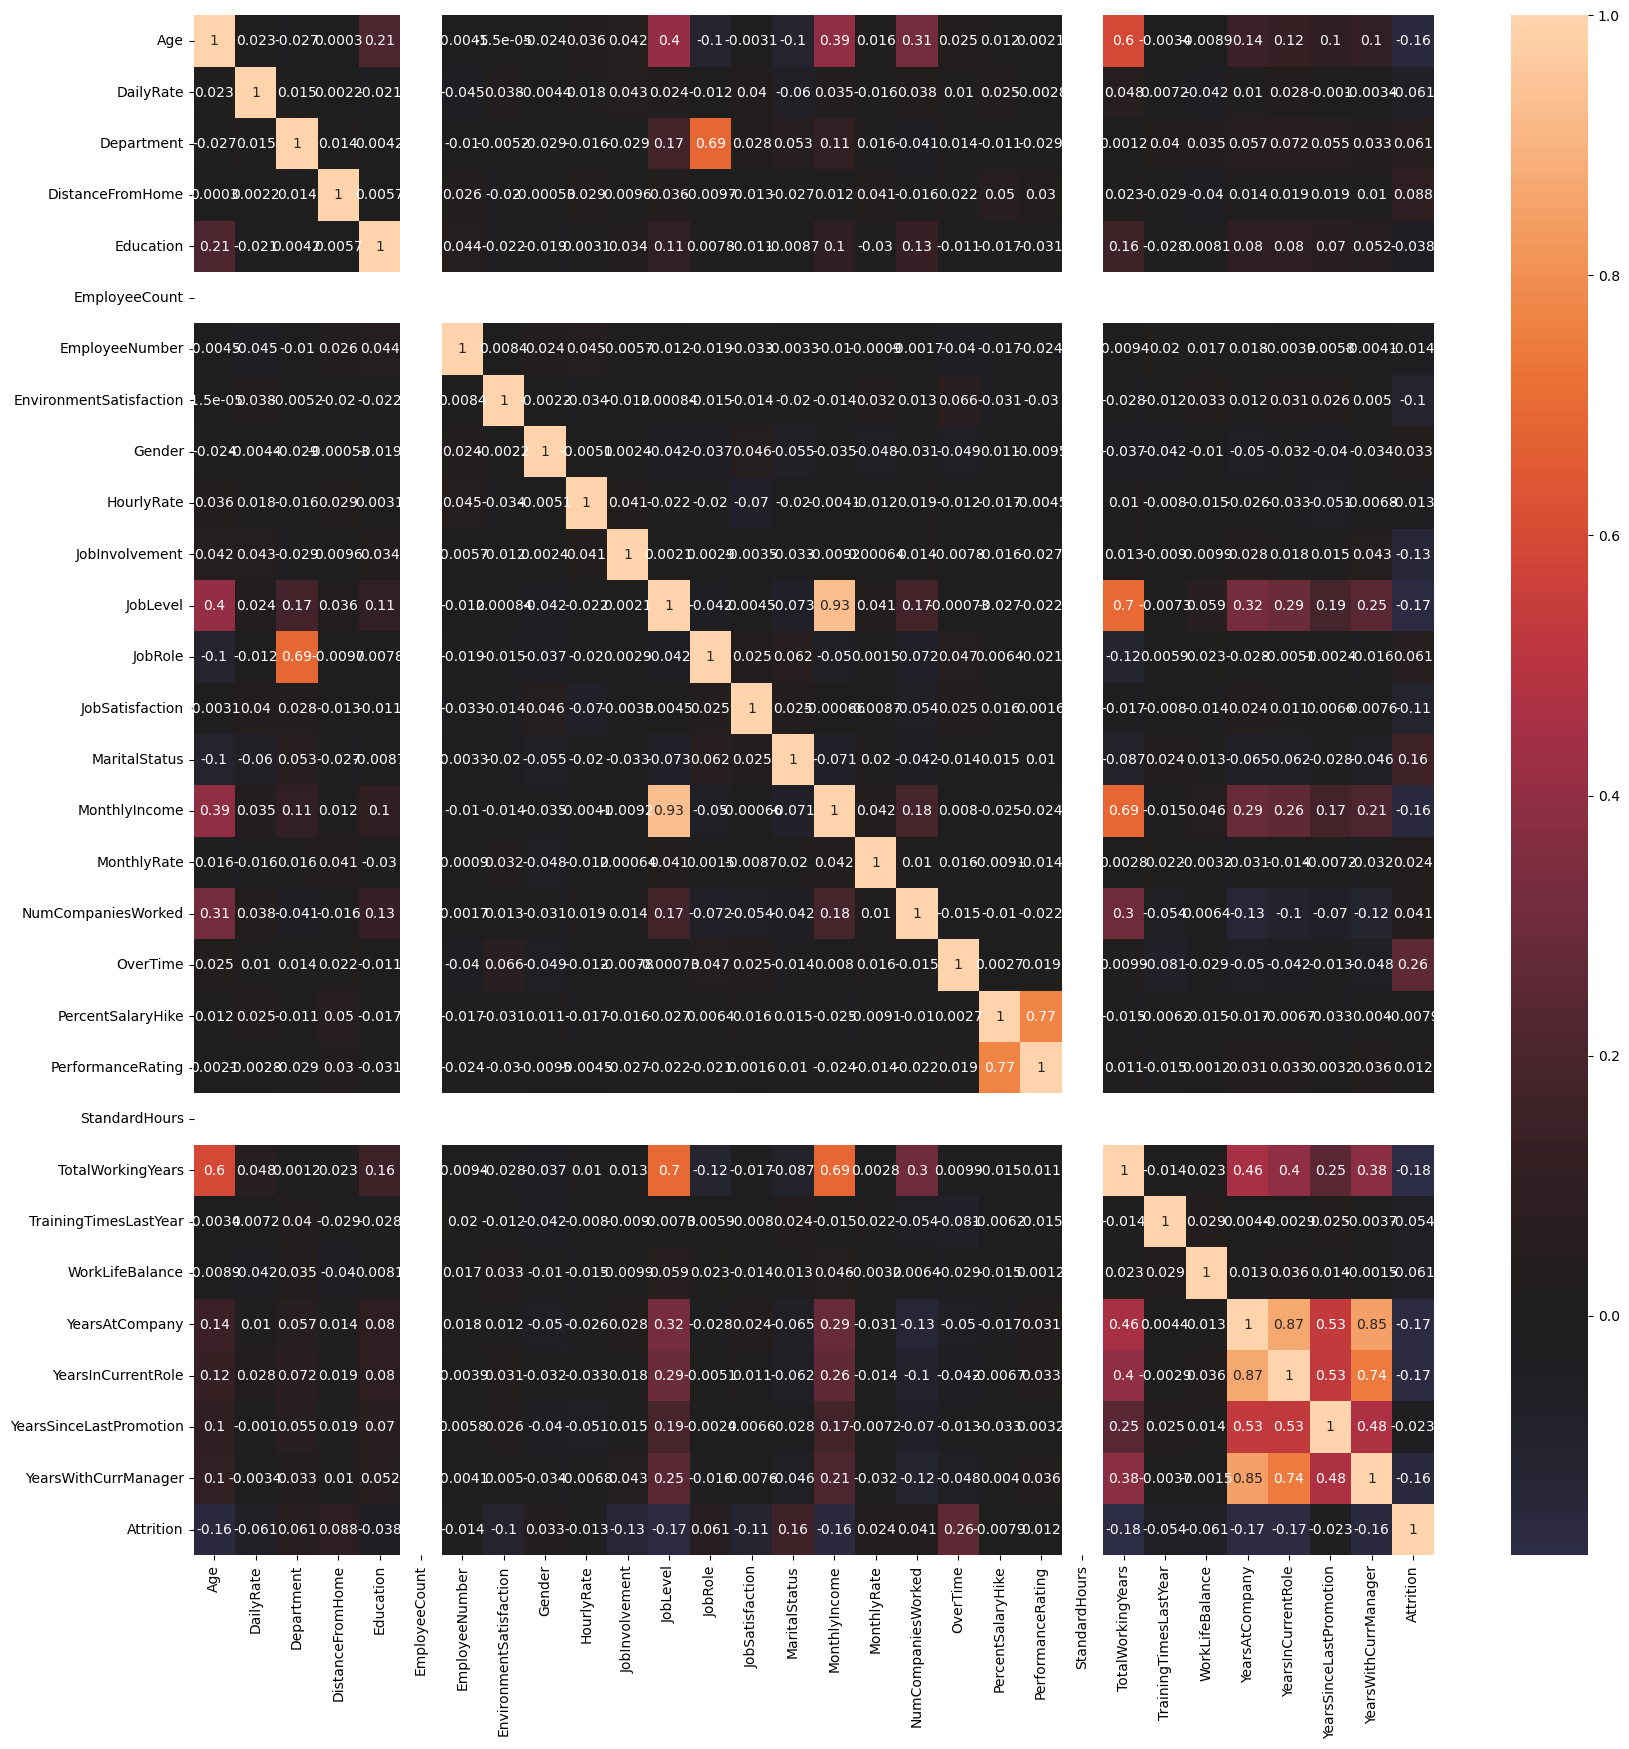

In [30]:
#correlation matrix
corrmat= scaled_df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

In [31]:
#scaled_ds=scaled_ds.drop(['TrainingTimesLastYear','DailyRate','StandardHours'],axis=1)
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1330 non-null   float64
 1   DailyRate                1330 non-null   float64
 2   Department               1330 non-null   float64
 3   DistanceFromHome         1330 non-null   float64
 4   Education                1330 non-null   float64
 5   EmployeeCount            1330 non-null   float64
 6   EmployeeNumber           1330 non-null   float64
 7   EnvironmentSatisfaction  1330 non-null   float64
 8   Gender                   1330 non-null   float64
 9   HourlyRate               1330 non-null   float64
 10  JobInvolvement           1330 non-null   float64
 11  JobLevel                 1330 non-null   float64
 12  JobRole                  1330 non-null   float64
 13  JobSatisfaction          1330 non-null   float64
 14  MaritalStatus           

In [32]:
#dropping the unimportant columns 
scaled_df=scaled_df.drop(['MonthlyRate','StandardHours','HourlyRate'],axis=1)

In [33]:
scaled_df.shape


(1330, 27)

# Train Test split of the data

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Separate target variable
x = scaled_df.drop('Attrition', axis=1)
y = scaled_df['Attrition']

In [35]:
a=df[df['Attrition']==1]
b=df[df['Attrition']==0]

print(a.shape,b.shape)

(226, 30) (1104, 30)


In [36]:
#splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [37]:
x_train.shape,y_train.shape

((1064, 26), (1064,))

In [38]:
'''!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn'''

'!pip uninstall scikit-learn --yes\n!pip uninstall imblearn --yes\n!pip install scikit-learn==1.2.2\n!pip install imblearn'

In [39]:
#pip install --upgrade imbalanced-learn


In [40]:
#pip show scikit-learn


# Handling imbalanced data

In [41]:
from imblearn.combine import SMOTETomek
#oversampling for handling imbalanced data 
smk=SMOTETomek(random_state=42)
x_res,y_res=smk.fit_resample(x,y)


In [42]:
x_res.shape,y_res.shape

((2204, 26), (2204,))

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
#Training the model
model=LogisticRegression()
model.fit(x_res,y_res)

LogisticRegression()

In [44]:
model.predict_proba(x_test)

array([[4.17117515e-01, 5.82882485e-01],
       [3.28612879e-02, 9.67138712e-01],
       [6.18287752e-01, 3.81712248e-01],
       [9.45558971e-02, 9.05444103e-01],
       [3.90528071e-01, 6.09471929e-01],
       [7.95028777e-01, 2.04971223e-01],
       [8.91141040e-01, 1.08858960e-01],
       [9.89444484e-01, 1.05555161e-02],
       [1.72310688e-01, 8.27689312e-01],
       [3.55559849e-01, 6.44440151e-01],
       [9.49122583e-01, 5.08774167e-02],
       [7.26352173e-01, 2.73647827e-01],
       [9.55468529e-01, 4.45314713e-02],
       [3.78028595e-01, 6.21971405e-01],
       [7.49323290e-01, 2.50676710e-01],
       [7.89129829e-01, 2.10870171e-01],
       [1.13403471e-01, 8.86596529e-01],
       [4.11190000e-01, 5.88810000e-01],
       [8.94212059e-01, 1.05787941e-01],
       [9.20583442e-02, 9.07941656e-01],
       [4.22799412e-01, 5.77200588e-01],
       [8.74003166e-01, 1.25996834e-01],
       [3.99122837e-01, 6.00877163e-01],
       [9.97417545e-01, 2.58245459e-03],
       [7.515685

In [45]:
#r=predicted values
r=model.predict(x_test)
r

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0])

In [46]:
#accuracy=TP+TN/TP+TN+FP+FN
model.score(x_test,y_test)

0.7406015037593985

In [47]:
from sklearn.metrics import confusion_matrix,classification_report
#Predicted values vs Actual values
matrix=confusion_matrix(y_test,r)
print(matrix)

[[155  58]
 [ 11  42]]


In [48]:
#Classification report prints precision=TP/TP+FP,recall=TP/TP+FN,f1_score=2/(1/precision+1/recall)
print(classification_report(y_test,r))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82       213
           1       0.42      0.79      0.55        53

    accuracy                           0.74       266
   macro avg       0.68      0.76      0.68       266
weighted avg       0.83      0.74      0.76       266



In [49]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Predict probabilities
y_pred_prob= model.predict_proba(x_test)[:,1]

# Calculate fpr,tpr
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_prob,pos_label=1)
roc_auc_1 = roc_auc_score(y_test,y_pred_prob)
roc_auc_1



0.8456019133669944

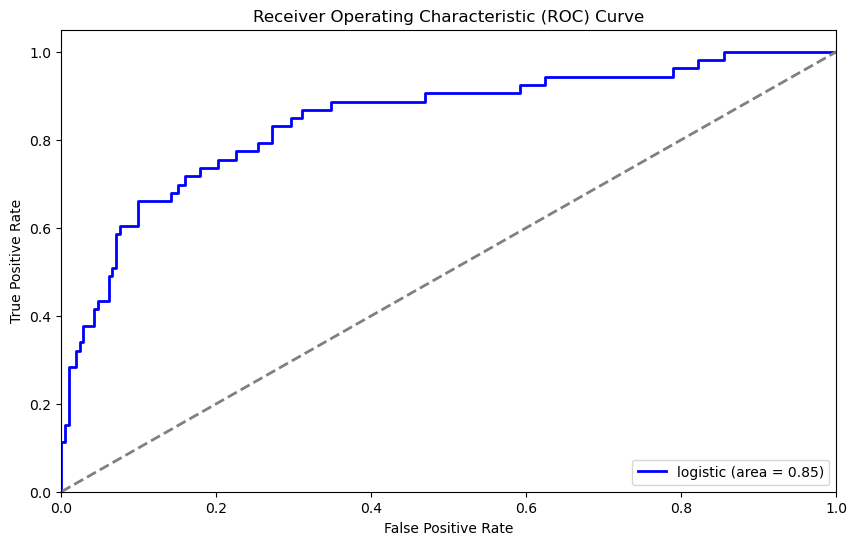

In [50]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'logistic (area = {roc_auc_1:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

An AUC-ROC value of 0.81 indicates good model performance. The model is able to differentiate between the classes with a high degree of accuracy.

# Random Forest Classifier

In [51]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



In [52]:
rfc=RandomForestClassifier(random_state=42)

Hyper-parameter tuning is performed using grid search to find the best fitted parameters and increase model accuracy

In [53]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [54]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_res, y_res)

C:\Users\ADRIJA\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADRIJA\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADRIJA\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\ADRIJA\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ADRIJA\anaconda3\Lib\site-p

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [55]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

In [56]:
rfc1=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 500, max_depth=8, criterion='gini')

In [57]:
rfc1.fit(x_res, y_res)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=500,
                       random_state=42)

In [58]:
pred=rfc1.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest: ",accuracy_score(y_test,pred))

Accuracy for Random Forest:  0.9548872180451128


In [60]:
# Predict probabilities
y_pred_prob=rfc1.predict_proba(x_test)[:,1]

# Calculate fpr,tpr
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_prob,pos_label=1)
roc_auc_2 = roc_auc_score(y_test,y_pred_prob)
roc_auc_2

0.9837009478253167

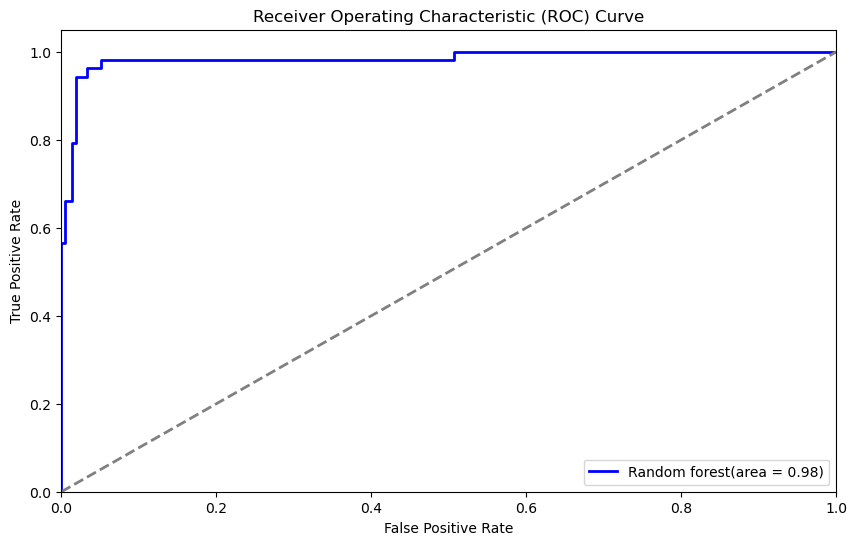

In [61]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr2, tpr2, color='blue', lw=2, label=f'Random forest(area = {roc_auc_2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# XGBoost Classifier 

In [62]:
#hyper parameter optimization
params={'learning_rate':[0.05,0.10,0.15,0.20],
         'max_depth'   :[3,4,5,6,8,10,12],
        'min_child_weight':[1,3,5,7],
        'gamma':[0.0,0.1,0.2,0.3,0.4],
        'colsample_bytree':[0.3,0.4,0.5,0.7]
       }

In [63]:
from sklearn.model_selection import RandomizedSearchCV


In [64]:
import xgboost
# Initialize the XGBoost Classifier using optimal hyperparameters
classifier= xgboost.XGBClassifier()


Using Randomized search hyper-parameter tuning is performed for better model accuracy

In [65]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=1,cv=5,verbose=3)

# Train the XGBoost classifier
random_search.fit(x_res, y_res)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.631 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.977 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.977 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.995 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.974 total time=   0.0s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=7;, score=0.676 total time=   0.0s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=7;, score=0.979 total time=   0.0s
[CV 3/5] END colsample_by

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [66]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.15,
 'gamma': 0.3,
 'colsample_bytree': 0.4}

In [68]:
classifier=xgboost.XGBClassifier(min_child_weight= 3,
 max_depth= 12,
 learning_rate= 0.15,
 gamma= 0.2,
 colsample_bytree= 0.5)
classifier.fit(x_res,y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
# Make predictions on the test set
y_pred = classifier.predict(x_test)


In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Cross-validation to evaluate model stability
cv_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}, Standard Deviation: {cv_scores.std():.2f}")


Accuracy: 1.00
Confusion Matrix:
[[213   0]
 [  1  52]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      0.98      0.99        53

    accuracy                           1.00       266
   macro avg       1.00      0.99      0.99       266
weighted avg       1.00      1.00      1.00       266

Cross-Validation Accuracy Scores: [0.85338346 0.84586466 0.86842105 0.86842105 0.83834586]
Mean CV Accuracy: 0.85, Standard Deviation: 0.01


In [71]:
# Predict probabilities
y_pred_prob=classifier.predict_proba(x_test)[:,1]

# Calculate fpr,tpr
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_prob,pos_label=1)
roc_auc_3 = roc_auc_score(y_test,y_pred_prob)
roc_auc_3

0.9894587651696342

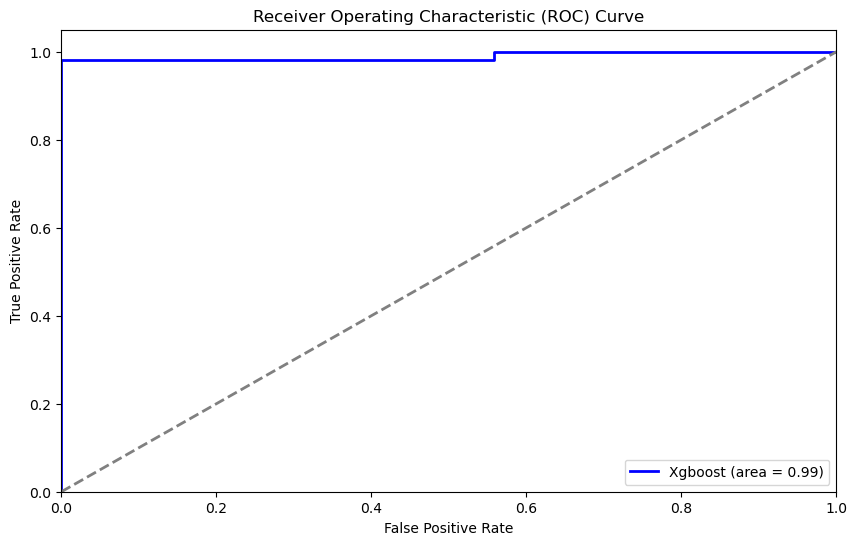

In [72]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr3, tpr3, color='blue', lw=2, label=f'Xgboost (area = {roc_auc_3:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
model = DecisionTreeClassifier()

In [75]:
model.fit(x_res,y_res)

DecisionTreeClassifier()

In [76]:
y_pred = model.predict(x_test)

In [77]:
from sklearn.metrics import confusion_matrix,classification_report

In [78]:
confusion_matrix(y_test,y_pred)

array([[213,   0],
       [  1,  52]], dtype=int64)

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      0.98      0.99        53

    accuracy                           1.00       266
   macro avg       1.00      0.99      0.99       266
weighted avg       1.00      1.00      1.00       266



In [80]:
model.feature_importances_

array([0.06157306, 0.03294584, 0.01827258, 0.05745721, 0.01737536,
       0.        , 0.03354072, 0.0587005 , 0.00619653, 0.02404849,
       0.05950647, 0.03560615, 0.033462  , 0.10621333, 0.02223873,
       0.03891701, 0.23287987, 0.01926568, 0.0041354 , 0.02776082,
       0.01048141, 0.01735745, 0.05023775, 0.00760321, 0.01179596,
       0.01242847])

In [81]:
pd.DataFrame(index=x.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Age,0.061573
DailyRate,0.032946
Department,0.018273
DistanceFromHome,0.057457
Education,0.017375
EmployeeCount,0.000000
EmployeeNumber,0.033541
EnvironmentSatisfaction,0.058701
Gender,0.006197
JobInvolvement,0.024048


In [82]:
def report_model(model):
    model_preds = model.predict(x_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    

In [83]:
#Dt lead to overfitting so prune the tree
pruned_tree = DecisionTreeClassifier(max_depth=8)
pruned_tree.fit(x_res,y_res)


DecisionTreeClassifier(max_depth=8)

In [84]:
report_model(pruned_tree)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       213
           1       0.81      0.91      0.86        53

    accuracy                           0.94       266
   macro avg       0.89      0.93      0.91       266
weighted avg       0.94      0.94      0.94       266





In [85]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(x_res,y_res)

DecisionTreeClassifier(criterion='entropy')

In [86]:
report_model(entropy_tree)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      0.98      0.99        53

    accuracy                           1.00       266
   macro avg       1.00      0.99      0.99       266
weighted avg       1.00      1.00      1.00       266





In [87]:
pruned_treee = DecisionTreeClassifier(max_leaf_nodes=4)
pruned_treee.fit(x_res,y_res)

DecisionTreeClassifier(max_leaf_nodes=4)

In [88]:
report_model(pruned_treee)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       213
           1       0.41      0.57      0.47        53

    accuracy                           0.75       266
   macro avg       0.64      0.68      0.65       266
weighted avg       0.79      0.75      0.76       266





In [89]:
# Predict probabilities
y_pred_prob=pruned_tree.predict_proba(x_test)[:,1]

# Calculate fpr,tpr
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred_prob,pos_label=1)
roc_auc_4 = roc_auc_score(y_test,y_pred_prob)
roc_auc_4

0.9476481530693596

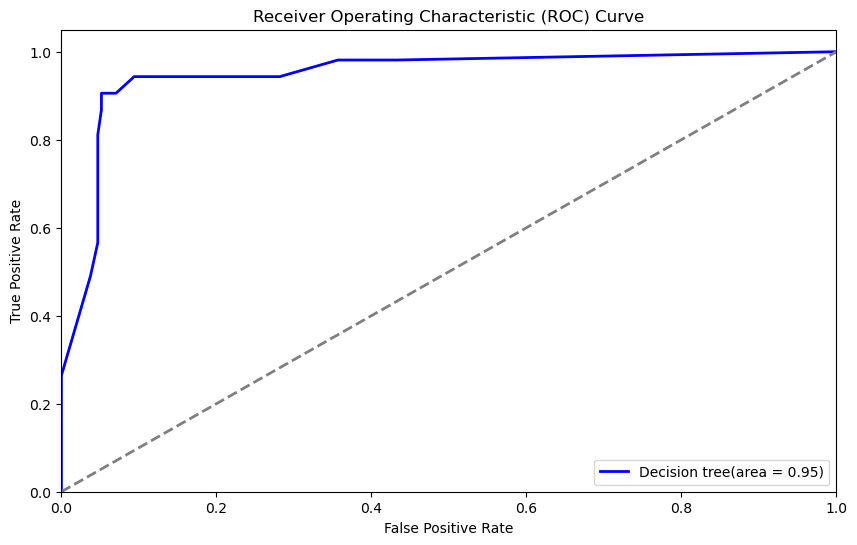

In [90]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr4, tpr4, color='blue', lw=2, label=f'Decision tree(area = {roc_auc_4:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Naive Baye's Classifier

In [91]:
def result(x, y, model):
   
    #fit on data
    model.fit(x_res, y_res)
    
    #prediction
    pred = model.predict(x_test)
    
    #performance of model
    print("Classification Report: \n", classification_report(y_test, pred))
    print("-" * 100)
    print()
     #accuracy of model
    acc = accuracy_score(y_test, pred)
    accuracy_list.append(acc)
    print("Accuracy Score: ", acc)
    print("-" * 100)
    print()

    #f1-score of model
    f1 = f1_score(y_test, pred)
    f1_list.append(f1)
    print("F1 Score: ", f1)
    print("-" * 100)
    print()

    #roc-auc curve of model
    fpr5,tpr5,threshold = roc_curve(y_test,pred)
    auc_value = auc(fpr5,tpr5)
    rocauc_score = roc_auc_score(y_test, pred)
    roc_auc_list.append(rocauc_score)
    plt.figure(figsize=(5,5),dpi=100)
    print("ROC-AUC Score: ", f1)
    print("-" * 100)
    print()
    plt.plot(fpr5,tpr5,linestyle='-',label = "(auc_value = %0.3f)" % auc_value)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    print()
    
  

In [92]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc
accuracy_list = []
f1_list = []
roc_auc_list = []

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.59      0.71       213
           1       0.30      0.72      0.42        53

    accuracy                           0.61       266
   macro avg       0.60      0.65      0.57       266
weighted avg       0.78      0.61      0.65       266

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.6127819548872181
----------------------------------------------------------------------------------------------------

F1 Score:  0.4245810055865922
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.4245810055865922
----------------------------------------------------------------------------------------------------



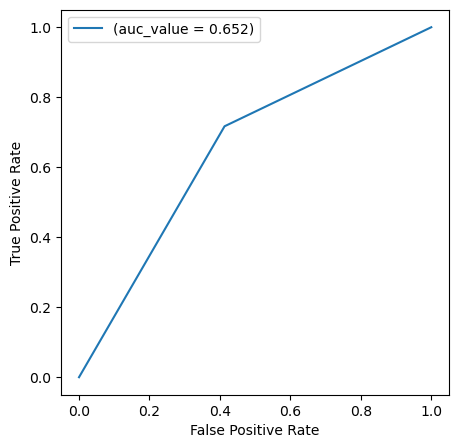

In [93]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
result(x, y, nb)

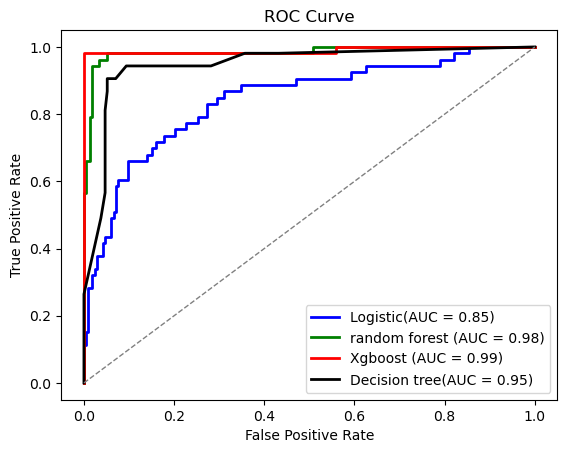

In [95]:
# Plot ROC curves
plt.figure()
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'Logistic(AUC = {roc_auc_1:.2f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'random forest (AUC = {roc_auc_2:.2f})')
plt.plot(fpr3, tpr3, color='red', lw=2, label=f'Xgboost (AUC = {roc_auc_3:.2f})')
plt.plot(fpr4, tpr4, color='black', lw=2, label=f'Decision tree(AUC = {roc_auc_4:.2f})')


# Diagonal line
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Show plot
plt.show()

# Conclusion

Here, the best fit model for employee attrition prediction is XGboost model which gives an accuracy of almost 99% , where as Naives Bayes Classifier doesn't perform seemingly well.
Hence
The closer the ROC curve is to the top-left corner of the plot, the better the model is at distinguishing between the positive and negative classes.
In this graph, the XGBoost model (red line) has the highest AUC (0.99), indicating it has the best performance among the models compared.
The Random Forest model (green line) also performs very well, with an AUC of 0.98.
The Decision Tree model (black line) has a good performance with an AUC of 0.95.
The Logistic Regression model (blue line) has the lowest performance among the four, but still has a decent AUC of 0.85.
Overall, this graph demonstrates that XGBoost and Random Forest are the most effective models for the classification task at hand, based on their ROC curves and AUC values.